In [3]:
import pandas as pd
import numpy as np
from dtypes import beers_dtype,breweries_dtypes
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [4]:
df = pd.read_csv('../data/beers.csv', dtype=beers_dtype)
df.shape

(2533906, 9)

In [5]:
breweries_df = pd.read_csv('../data/breweries.csv', dtype=breweries_dtypes)
breweries_df.shape

(68989, 8)

In [6]:
df['country'] = df.brewery_id.map(breweries_df.set_index('id')['country'])
# df.dropna(subset='country')

In [7]:
df['created_at_datetime'] = pd.to_datetime(df['created_at'], format='%a, %d %b %Y %H:%M:%S %z')
df['created_at_year'] = df.created_at_datetime.dt.year

In [8]:
df.head()

,id,name,style,abv,ibu,created_at,rating_score,rating_count,brewery_id,country,created_at_datetime,created_at_year
0,1489793,Tiger Black - Strong,Lager - Dark,6.9,0.0,"Thu, 31 Mar 2016 16:35:07 +0000",2.892,1801,3097,Singapore,2016-03-31 16:35:07+00:00,2016
1,2041142,Tiger Light,Lager - American Light,4.1,0.0,"Thu, 13 Apr 2017 12:17:15 +0000",2.498,1230,3097,Singapore,2017-04-13 12:17:15+00:00,2017
2,2208995,Anchor Smooth Draught,Pilsner - Other,4.2,0.0,"Sun, 23 Jul 2017 22:47:25 +0000",2.669,299,3097,Singapore,2017-07-23 22:47:25+00:00,2017
3,3193184,Tiger Seasonal Brew - Orchid,Lager - Amber / Red,5.5,0.0,"Wed, 24 Apr 2019 10:10:50 +0000",3.276,236,3097,Singapore,2019-04-24 10:10:50+00:00,2019
4,1591048,Tiger Silver,Lager - Pale,3.8,0.0,"Tue, 07 Jun 2016 20:47:23 +0000",2.682,114,3097,Singapore,2016-06-07 20:47:23+00:00,2016


In [9]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,id,abv,ibu,rating_score,rating_count,brewery_id,created_at_year
count,2533906.00,2533906.00,2533906.00,2533906.00,2533906.00,2533906.00,2533906.00
mean,3246108.10,5.97,18.55,2.63,360.78,196261.48,2018.85
std,1376191.22,2.77,9423.17,1.71,3652.03,162623.78,2.70
min,1.00,0.00,-66.00,0.00,0.00,1.00,2010.00
25%,2260743.25,4.86,0.00,0.00,7.00,31565.00,2017.00
50%,3398677.00,5.80,0.00,3.57,34.00,184717.00,2019.00
75%,4419046.75,7.00,20.00,3.83,137.00,340844.00,2021.00
max,5317180.00,100.00,15000000.00,5.00,801493.00,538969.00,2023.00


In [10]:
beers_rus_df = df[df.brewery_id.isin(breweries_df[breweries_df.country == 'Russia'].id)]
beers_usa_df = df[df.brewery_id.isin(breweries_df[breweries_df.country == 'United States'].id)]
beers_germany_df = df[df.brewery_id.isin(breweries_df[breweries_df.country == 'Germany'].id)]
beers_china_df = df[df.brewery_id.isin(breweries_df[breweries_df.country.str.contains('China')].id)]
beers_belgium_df = df[df.brewery_id.isin(breweries_df[breweries_df.country == 'Belgium'].id)]
beers_japan_df = df[df.brewery_id.isin(breweries_df[breweries_df.country == 'Japan'].id)]
print('Russia: ', beers_rus_df.shape)
print('USA: ', beers_usa_df.shape)
print('Germany: ', beers_germany_df.shape)
print('China: ', beers_china_df.shape)
print('Belgium: ', beers_belgium_df.shape)
print('Japan: ', beers_japan_df.shape)

Russia:  (49476, 12)
USA:  (1497342, 12)
Germany:  (52784, 12)
China:  (7379, 12)
Belgium:  (32724, 12)
Japan:  (32667, 12)


# ---------------------

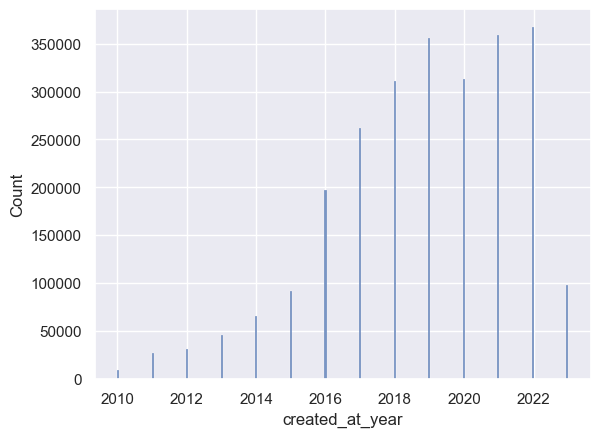

In [ ]:
sns.histplot(df.created_at_year);

In [13]:
df.country.value_counts()[:10]

United States    1497342
England           134116
Canada            132556
Germany            52784
Australia          51082
Brazil             50707
Russia             49476
Netherlands        47534
France             41648
Sweden             33867
Name: country, dtype: int64

In [14]:
df.country.value_counts()

United States     1497342
England            134116
Canada             132556
Germany             52784
Australia           51082
                   ...   
South Sudan             2
All                     2
Libya                   1
American Samoa          1
Kuwait                  1
Name: country, Length: 214, dtype: int64

In [36]:
df[(df['style'] == 'Lager - Pale') & df.rating_score != 0].rating_score.describe()

count    22657.000000
mean         3.194464
std          0.454827
min          1.099000
25%          2.885220
50%          3.250000
75%          3.536080
max          4.550000
Name: rating_score, dtype: float64

In [37]:
df[(df.country == 'Russia') & (df['style'] == 'Lager - Pale') & df.rating_score != 0].rating_score.describe()

count    2095.000000
mean        2.797183
std         0.402653
min         1.336560
25%         2.536230
50%         2.745000
75%         3.056080
max         4.183000
Name: rating_score, dtype: float64

In [50]:
sums_of_styles = df.groupby('style', as_index=False)['rating_count'].sum().sort_values('rating_count', ascending=False)
sums_of_styles[:10]

,style,rating_count
81,IPA - American,100573754
91,IPA - Imperial / Double,51707873
96,IPA - New England / Hazy,44956972
164,Pale Ale - American,37780865
221,Stout - Imperial / Double,26979480
125,Lager - Pale,20330401
50,Farmhouse Ale - Saison,19176503
94,IPA - Imperial / Double New England / Hazy,19029181
102,IPA - Session,17193794
207,Sour - Fruited,17147046


In [145]:
N_TOP_STYLES = 20

def style_counts(df):
	sums_of_styles = df.groupby('style', as_index=False)['rating_count'].sum()
	beer_counts = df['style'].value_counts()
	sums_of_styles['beer_count'] = sums_of_styles['style'].map(beer_counts)
	sums_of_styles['checkins_per_style'] = (sums_of_styles['rating_count'] / sums_of_styles['beer_count']).round()
	sums_of_styles = sums_of_styles.sort_values('rating_count', ascending=False)
	print(f'avg_checkins_per_style mean of top {N_TOP_STYLES} styles:', sums_of_styles[:N_TOP_STYLES].checkins_per_style.mean().round())
	sums_of_styles.to_csv('sums_of_styles.csv', index=False)
	return sums_of_styles[:N_TOP_STYLES]

In [140]:
style_counts(df)

avg_checkins_per_style mean of top 20 styles: 414.0


,style,rating_count,beer_count,checkins_per_style
81,IPA - American,100573754,201685,499.0
91,IPA - Imperial / Double,51707873,73022,708.0
96,IPA - New England / Hazy,44956972,122982,366.0
164,Pale Ale - American,37780865,105138,359.0
221,Stout - Imperial / Double,26979480,65750,410.0
125,Lager - Pale,20330401,34474,590.0
50,Farmhouse Ale - Saison,19176503,77127,249.0
94,IPA - Imperial / Double New England / Hazy,19029181,31400,606.0
102,IPA - Session,17193794,38036,452.0
207,Sour - Fruited,17147046,76885,223.0


In [146]:
style_counts(beers_rus_df)

avg_checkins_per_style mean of top 20 styles: 334.0


,style,rating_count,beer_count,checkins_per_style
207,Sour - Fruited,576420,1545,373.0
81,IPA - American,538274,2186,246.0
96,IPA - New England / Hazy,535303,1277,419.0
94,IPA - Imperial / Double New England / Hazy,444464,569,781.0
125,Lager - Pale,406151,4672,87.0
211,Sour - Other Gose,401146,967,415.0
212,Sour - Smoothie / Pastry,345648,632,547.0
91,IPA - Imperial / Double,334063,1039,322.0
209,Sour - Fruited Gose,278804,694,402.0
164,Pale Ale - American,251634,1530,164.0


In [144]:
c = style_counts(beers_rus_df)
c.iloc[c.checkins_per_style.argmax()]

avg_checkins_per_style mean of top 20 styles: 334.0


style                 IPA - Imperial / Double New England / Hazy
rating_count                                              444464
beer_count                                                   569
checkins_per_style                                         781.0
Name: 94, dtype: object

In [143]:
style_counts(beers_usa_df)

avg_checkins_per_style mean of top 20 styles: 447.0


,style,rating_count,beer_count,checkins_per_style
81,IPA - American,77888206,141268,551.0
91,IPA - Imperial / Double,42652981,52040,820.0
96,IPA - New England / Hazy,29941906,83528,358.0
164,Pale Ale - American,24266010,61505,395.0
221,Stout - Imperial / Double,21147130,48313,438.0
94,IPA - Imperial / Double New England / Hazy,13415597,22402,599.0
50,Farmhouse Ale - Saison,13109668,49766,263.0
207,Sour - Fruited,11359488,53030,214.0
102,IPA - Session,8856009,16478,537.0
189,Red Ale - American Amber / Red,8123953,15578,522.0


In [157]:
def style_counts_by_rating(df, N_TOP_STYLES=20):
	sums_of_styles = df.groupby('style', as_index=False)['rating_score'].median().sort_values('rating_score', ascending=False)
	# beer_counts = df['style'].value_counts()
	# sums_of_styles['beer_count'] = sums_of_styles['style'].map(beer_counts)
	# sums_of_styles['checkins_per_style'] = (sums_of_styles['rating_count'] / sums_of_styles['beer_count']).round()
	# sums_of_styles = sums_of_styles.sort_values('rating_count', ascending=False)
	return sums_of_styles[:N_TOP_STYLES]

In [155]:
style_counts_by_rating(df)

,style,rating_score
105,IPA - Triple New England / Hazy,3.736073
225,Stout - Imperial / Double Pastry,3.682736
212,Sour - Smoothie / Pastry,3.609852
262,Ukrainian Golden Ale,3.594831
94,IPA - Imperial / Double New England / Hazy,3.542819
99,IPA - Quadruple,3.540148
217,Stout - Belgian,3.454225
44,Farmhouse Ale - Bière de Coupage,3.452634
222,Stout - Imperial / Double Coffee,3.446530
93,IPA - Imperial / Double Milkshake,3.438703


In [164]:
style_counts_by_rating(beers_rus_df, 30)

,style,rating_score
129,Lambic - Faro,4.188000
53,Freeze-Distilled Beer,4.089000
212,Sour - Smoothie / Pastry,4.080000
138,Mead - Acerglyn / Maple Wine,4.045000
185,Porter - Imperial / Double Coffee,4.041000
99,IPA - Quadruple,4.038000
184,Porter - Imperial / Double Baltic,4.033000
105,IPA - Triple New England / Hazy,4.006000
225,Stout - Imperial / Double Pastry,4.004500
108,Koji / Ginjo Beer,3.987000


In [162]:
c = style_counts_by_rating(beers_rus_df, 272)
c[c['style'] == 'Stout - Russian Imperial']

,style,rating_score
233,Stout - Russian Imperial,3.843


In [168]:
beers_rus_df.rating_score.median()

3.046334980010986

In [167]:
beers_usa_df.rating_score.median()

3.686

In [169]:
beers_belgium_df.rating_score.median()

3.395

In [170]:
df.rating_score.median()

3.57

In [174]:
beers_japan_df.rating_score.describe()

count    32667.000000
mean         1.774685
std          1.820718
min          0.000000
25%          0.000000
50%          0.000000
75%          3.662000
max          4.437500
Name: rating_score, dtype: float64